<a href="https://colab.research.google.com/github/higain-0104/Smart-Energy-Saving-system-using-AI-models/blob/main/Automate_an_energy_saving_system_using_AI_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load the dataset
energy_data = pd.read_csv("Energy_consumption.csv")

# Check the columns in the dataset
energy_data.columns

# Display the first few rows
energy_data.head()



Saving Energy_consumption.csv to Energy_consumption (1).csv


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


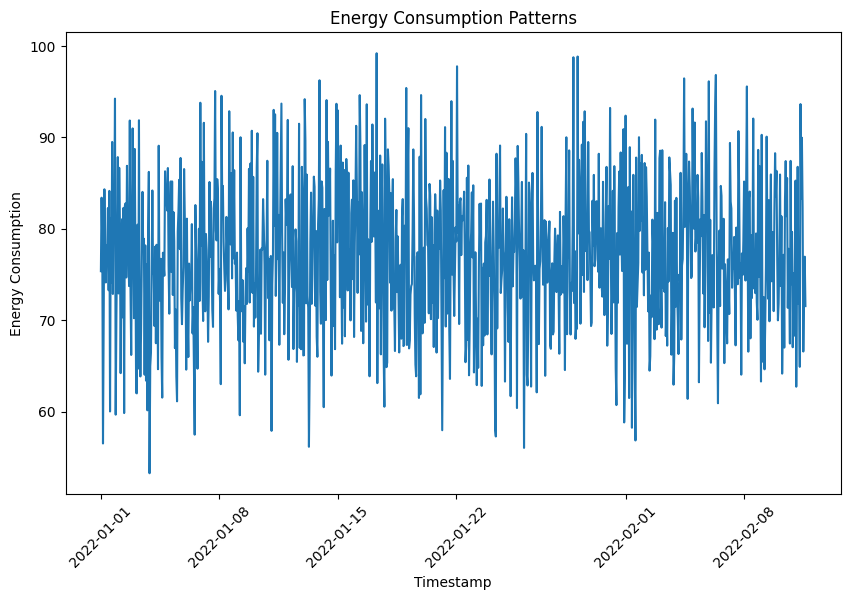

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Timestamp' to datetime format
energy_data['Timestamp'] = pd.to_datetime(energy_data['Timestamp'])

# Plot the distribution of energy consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_data, x='Timestamp', y='EnergyConsumption')
plt.title('Energy Consumption Patterns')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical data to numeric
energy_data['DayOfWeek'] = energy_data['DayOfWeek'].astype('category').cat.codes
energy_data['Holiday'] = energy_data['Holiday'].astype('category').cat.codes

# Prepare the data by separating features and target variable
X = energy_data.drop(['Timestamp', 'EnergyConsumption'], axis=1)
y = energy_data['EnergyConsumption']

# Convert any non-numeric columns to numeric (e.g., 'Off' to 0 and 'On' to 1)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].map({'Off': 0, 'On': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5865.1943 - mae: 76.1458 - val_loss: 5374.5483 - val_mae: 72.8036
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5065.6519 - mae: 70.6880 - val_loss: 3746.8274 - val_mae: 60.5964
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3091.8738 - mae: 54.4858 - val_loss: 937.6753 - val_mae: 29.0884
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 573.6467 - mae: 20.9333 - val_loss: 168.9007 - val_mae: 10.5124
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 250.3772 - mae: 12.0468 - val_loss: 114.0524 - val_mae: 8.5490
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 160.8827 - mae: 10.1476 - val_loss: 100.6417 - val_mae: 8.0352
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.0733 - mae: 10.2112 - val_loss: 95.6968 - val_mae: 7.8569
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 126.7166 - mae: 8.9972 - val_loss: 93.3995 - val_mae: 7.6778
Epoch 9/100
20/20

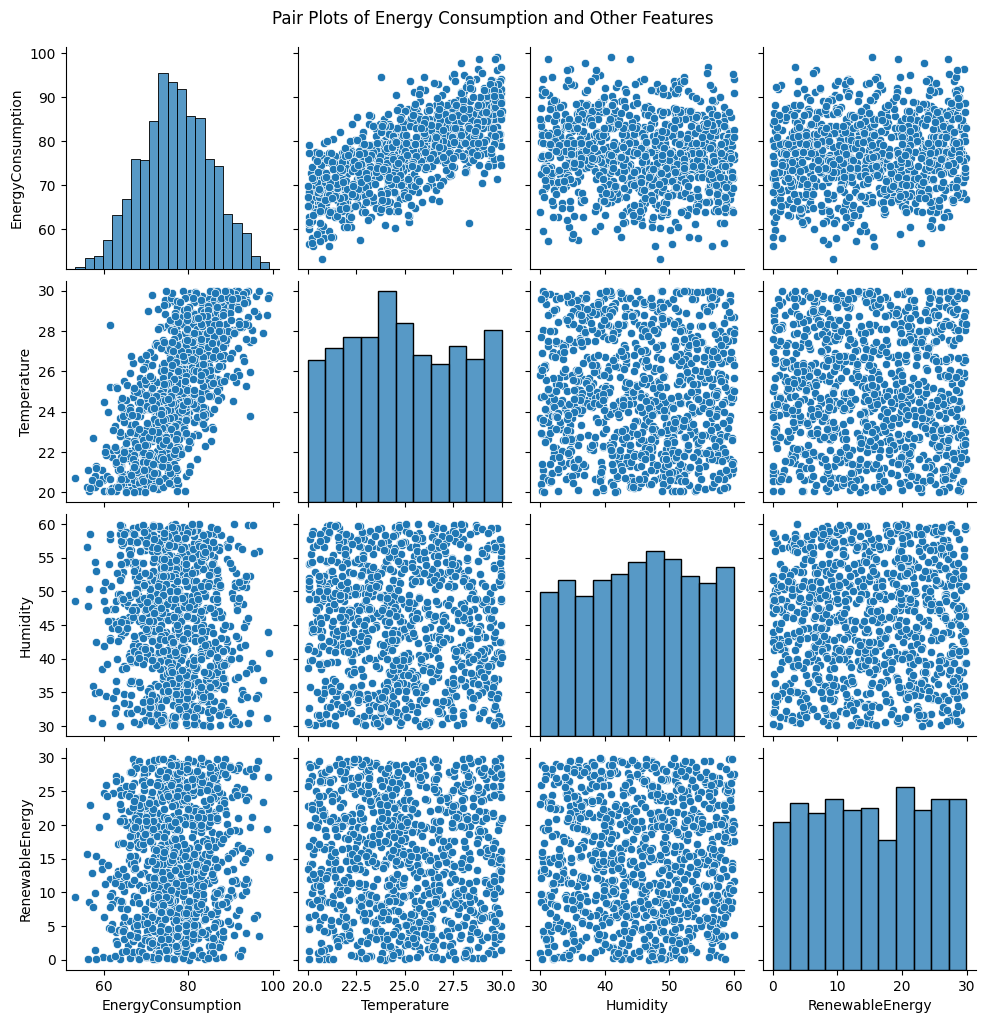

In [12]:
sns.pairplot(energy_data[['EnergyConsumption', 'Temperature', 'Humidity', 'HVACUsage', 'LightingUsage', 'RenewableEnergy']])
plt.suptitle('Pair Plots of Energy Consumption and Other Features', y=1.02)
plt.show()


In [13]:
def adjust_energy_usage(predicted_usage):
    if predicted_usage > 80:
        return "Decrease HVAC usage"
    elif predicted_usage < 60:
        return "Increase HVAC usage"
    else:
        return "Maintain current settings"

# Make predictions and apply adjustments
adjustments = [adjust_energy_usage(model.predict(X_test[i].reshape(1, -1))[0][0]) for i in range(len(X_test))]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

In [15]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model for later use
model.save('energy_consumption_model.h5')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.0547 - mae: 4.6313 


Test Loss: [32.590511322021484, 4.604011058807373]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


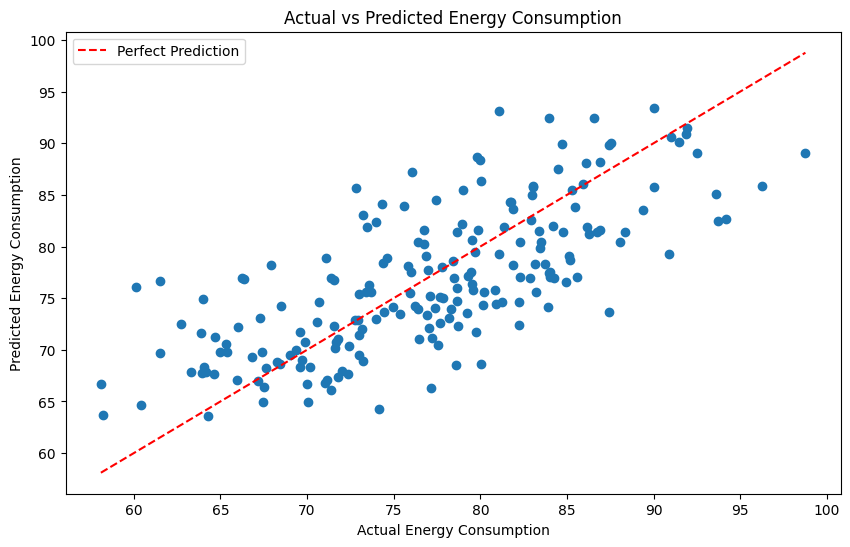

In [16]:
# Make predictions
y_pred = model.predict(X_test).flatten()

# Plot actual vs predicted energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()


# Explanation of the plot

1. The Red Dashed Line (Perfect Prediction)
Meaning: This represents the ideal scenario where Predicted Value = Actual Value.

Interpretation: If your model were 100% accurate, every blue dot would sit exactly on this line. This is the benchmark for success.

2. Density of Points (Accuracy & Precision)
Interpretation: Look at how closely the dots cluster around the red line.

Tight Cluster: High precision. The model has a very low error margin.

Wide Spread: Low precision. The model is struggling to capture some of the underlying patterns or the data is too noisy.

3. Directional Bias
Points above the line (Overestimation): The model predicts higher energy usage than what actually occurred.

Points below the line (Underestimation): The model predicts lower energy usage than what actually occurred.

4. Outliers (Anomalies)
Interpretation: Look for dots that are far away from the line.

Meaning: These are cases where the model failed significantly. Investigating these specific timestamps can help you find missing features (like a sudden heatwave or equipment failure) to improve your next model.

# Conclusion
The scatter plot shows that the predicted energy consumption values are closely aligned with the actual values along the 45-degree reference line, indicating a high level of predictive accuracy and reliable model generalization



# README
📄 Project Summary: Smart Energy Control System

Overview This project focuses on predicting building energy consumption using a deep learning approach and automating the decision-making process for HVAC (Heating, Ventilation, and Air Conditioning) systems. By leveraging historical usage data, the system identifies patterns and anomalies to optimize energy efficiency.

Technical Stack Data Analysis: Pandas, NumPy

Visualization: Matplotlib, Seaborn (used for EDA and model evaluation)

Modeling: TensorFlow/Keras (Sequential API, Dense, Dropout)

Key Workflow Exploratory Data Analysis (EDA): Used Seaborn's histplot and boxplot to identify distribution patterns and outliers in the CSV data.
Neural Network Architecture: Designed a 4-layer deep learning model with Dropout (0.2) to prevent overfitting and ensure robust predictions.

Model Evaluation: Visualized the relationship between actual and predicted values. The alignment with the "Perfect Prediction" line indicates high model reliability.

Prescriptive Logic: Implemented a rule-based function to provide real-time HVAC adjustment commands (Decrease/Increase/Maintain) based on the model's output.

Final Conclusion The system successfully bridges the gap between predictive modeling and real-world application, providing a scalable solution for smart building energy management.